In [1]:
import dpkt

In [20]:
f = open('TCP-TACK_test.pcap', 'rb')
pcap = dpkt.pcap.Reader(f)
pcap_bytes = pcap.readpkts()

In [19]:
pacp_bytes[-1][0]

1607188050.510484

In [30]:
time_start = pcap_bytes[0][0]
time_end = pcap_bytes[-1][0]
throughput = 0.0

In [31]:
print(time_start)
print(time_end)
time_len = time_end-time_start

1607188045.92285
1607188050.510484


In [33]:
for packet in pcap_bytes:
    if len(packet[1])==1394:
        throughput += (1312-20)*8

In [34]:
throughput/(time_end-time_start)

18562575.478409134

Network throughput is 18.5Mbps

In [61]:
tmp = time_start
tmp_throughput = 0
r_throughput = []
for packet in pcap_bytes:
    if len(packet[1])==1394:
        if packet[0]<tmp+0.1:
            tmp_throughput+= (1312-20)*8
        else:
            r_throughput.append(tmp_throughput*10/1000000)
            tmp_throughput = 0
            tmp = tmp+0.1
r_throughput.append(tmp_throughput*10/1000000)

In [62]:
r_throughput

[4.54784,
 14.36704,
 15.60736,
 17.36448,
 17.98464,
 17.0544,
 17.0544,
 24.70304,
 29.25088,
 29.76768,
 28.83744,
 21.80896,
 18.39808,
 18.39808,
 18.39808,
 18.50144,
 18.39808,
 18.39808,
 18.50144,
 18.39808,
 18.29472,
 18.39808,
 18.50144,
 18.39808,
 18.39808,
 18.39808,
 18.29472,
 18.39808,
 18.50144,
 18.50144,
 18.39808,
 18.39808,
 18.39808,
 16.95104,
 19.94848,
 18.29472,
 18.39808,
 18.29472,
 18.6048,
 18.39808,
 18.19136,
 18.39808,
 18.50144,
 18.50144,
 18.39808,
 1.0336]

In [63]:
import matplotlib.pyplot as plt

In [64]:
x = []
for i in range(len(r_throughput)):
    x.append(0.1*i)

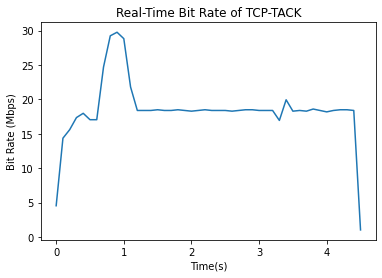

In [65]:
plt.plot(x,r_throughput)
plt.title('Real-Time Bit Rate of TCP-TACK')
plt.xlabel('Time(s)')
plt.ylabel('Bit Rate (Mbps)')
plt.savefig('TCP-TACK_bit_rate')
plt.show()

In [66]:
ack_count = 0
data_count = 0
for packet in pcap_bytes:
    if len(packet[1]) == 294:
        ack_count += 1
    if len(packet[1]) == 1394:
        data_count += 1

In [67]:
ack_count

1372

In [68]:
data_count

8239

1:8 is close to the optimal ACK/Data packet ratio in IEEE 802.11g networks.

In [70]:
tmp = time_start
tmp_ack = 0
r_ack = []
for packet in pcap_bytes:
    if len(packet[1]) == 294:
        if packet[0]<tmp+0.1:
            tmp_ack += 1
        else:
            r_ack.append(tmp_ack)
            tmp_ack = 0
            tmp = tmp + 0.1
r_ack.append(tmp_ack)

In [71]:
len(r_ack)

46

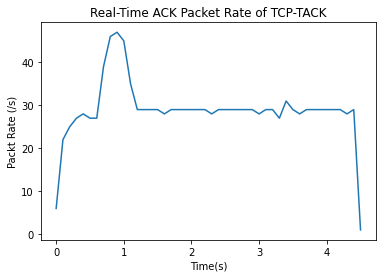

In [72]:
plt.plot(x,r_ack)
plt.title('Real-Time ACK Packet Rate of TCP-TACK')
plt.xlabel('Time(s)')
plt.ylabel('Packt Rate (/s)')
plt.savefig('TCP-TACK_ack_rate')
plt.show()